In [0]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
#Instantiating a small convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Adding a classifier on top of the convnet

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [0]:
#Training the convnet on MNIST images
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#compile and fit model
model.compile(optimizer='Adagrad', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 47s 969us/step - loss: 1.4768 - acc: 0.9077 - val_loss: 0.5403 - val_acc: 0.9663
Epoch 2/5
48000/48000 [==============================] - 44s 926us/step - loss: 0.5929 - acc: 0.9628 - val_loss: 0.4725 - val_acc: 0.9703
Epoch 3/5
48000/48000 [==============================] - 45s 940us/step - loss: 0.5324 - acc: 0.9665 - val_loss: 0.4734 - val_acc: 0.9704
Epoch 4/5
48000/48000 [==============================] - 45s 942us/step - loss: 0.5156 - acc: 0.9676 - val_loss: 0.4425 - val_acc: 0.9722
Epoch 5/5
48000/48000 [==============================] - 45s 939us/step - loss: 0.4928 - acc: 0.9691 - val_loss: 0.5502 - val_acc: 0.9656


In [0]:
#evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 4s 357us/step


0.9679

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 46s 958us/step - loss: 0.8245 - acc: 0.9484 - val_loss: 1.0185 - val_acc: 0.9363
Epoch 2/5
48000/48000 [==============================] - 45s 944us/step - loss: 0.8351 - acc: 0.9477 - val_loss: 1.2005 - val_acc: 0.9253
Epoch 3/5
48000/48000 [==============================] - 46s 954us/step - loss: 0.9090 - acc: 0.9432 - val_loss: 0.7083 - val_acc: 0.9560
Epoch 4/5
48000/48000 [==============================] - 44s 927us/step - loss: 0.8555 - acc: 0.9465 - val_loss: 0.7585 - val_acc: 0.9527
Epoch 5/5
48000/48000 [==============================] - 45s 932us/step - loss: 0.8673 - acc: 0.9458 - val_loss: 1.2225 - val_acc: 0.9238


In [0]:
#evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 310us/step


0.922

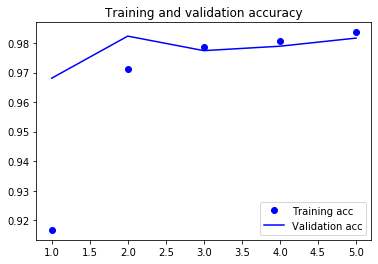

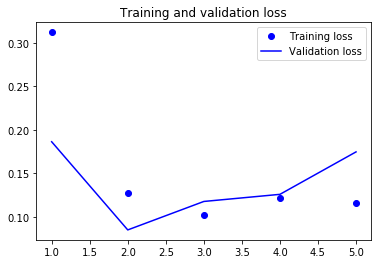

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()